In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
%matplotlib inline
#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

In [3]:
from Star import *

In [4]:
from Load import *

In [5]:
from bulk import *

In [6]:
a = 239.55
b = 188.85
c = 144.38
d = 127.47

# PLOTS

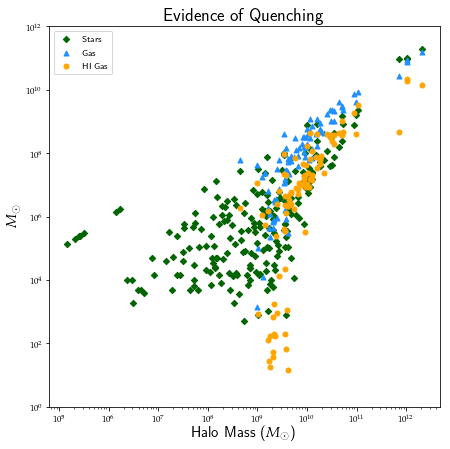

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(data['mass'], data['M_star'], label='Stars', c='darkgreen', s=20, marker='D')
plt.scatter(data['mass'], data['M_gas'], label='Gas', c='dodgerblue', s=25, marker='^')
plt.scatter(data['mass'], data['mHI'], label='HI Gas', c='orange', s=25)
plt.loglog()
plt.ylim(1, 1e12)
plt.xlabel(r'Halo Mass ($M_{\odot}$)', size=15)
plt.ylabel(r'$M_{\odot}$', size=15)
plt.title('Evidence of Quenching', size=18)
plt.legend()
plt.show()

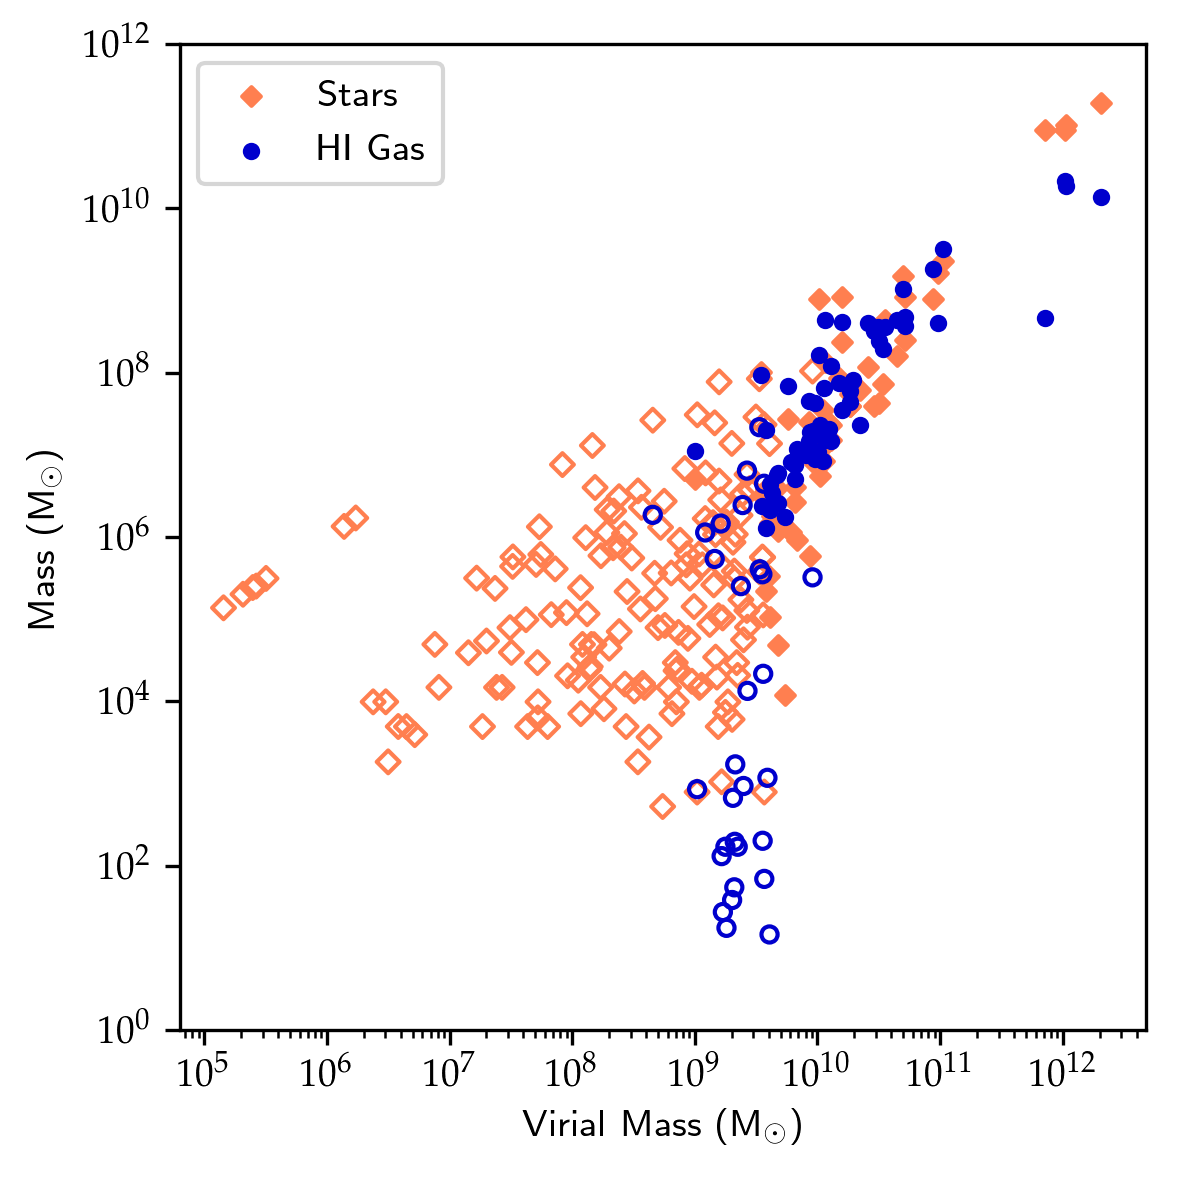

In [27]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['mass'][q], data['M_star'][q], label=None, facecolors='none', edgecolors='coral', s=15, marker='D')
plt.scatter(data['mass'][u], data['M_star'][u], label='Stars', c='coral', s=10, marker='D')
plt.scatter(data['mass'][q], data['mHI'][q], label=None, facecolors='none', edgecolors='mediumblue', s=15)
plt.scatter(data['mass'][u], data['mHI'][u], label='HI Gas', c='mediumblue', s=10)
plt.loglog()
plt.ylim(1, 1e12)
plt.xlabel(r'Virial Mass (M$_{\odot}$)')
plt.ylabel(r'Mass (M$_{\odot}$)')
#plt.title('Evidence of Quenching', size=18)
plt.legend()
# plt.subplots_adjust(left=0.2)
plt.tight_layout()
plt.savefig('A1.png', dpi=300)
plt.show()

Can be used as evidence for quenching, nearly all halos with halo mass below certain value are completely stripped of gas - ease of quenching corresponds to size
significant amounts of scatter in area containing qenched galaxies
near cutoff between quenched and non quenched the gas masses trail off to zero very rapidlybefore disapearing altogether

# Muratov

In [37]:
#Vc == ((Gravitational constant * Halo Mass)/Rvir)**(1/2)
G = 4.302*1e-3           #in pc/Msol(km/s)**2
h = 0.6776942783267969          #halo.properties['h']
Rvir = data['Rvir']*1000*h
V_c = (G* data['mass']/Rvir)**(1/2)     #km/s

In [61]:
len(data['M_star'][ng & f & u])

5

satellites  
-0.6087 x + 6.069
fields  
-0.3034 x + 3.291


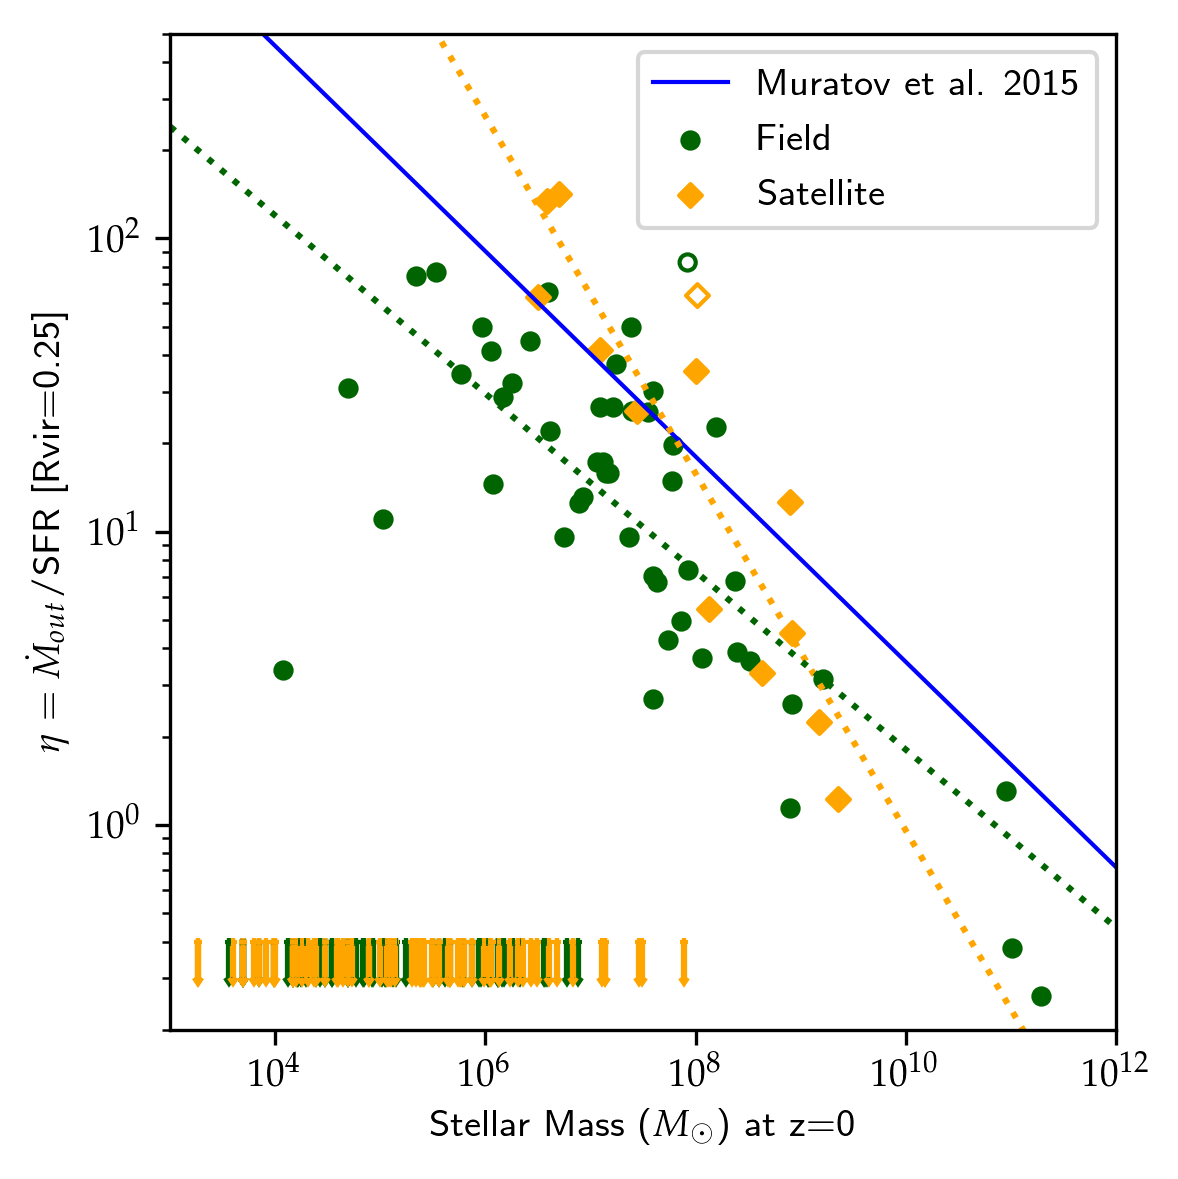

In [45]:
xfit = np.array([100,1e13])
n = 3.6*(xfit/10**10)**(-.35)    #unitlessRogue['G_outflow_1.5']
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][q & f], data['G_outflow_2.5'][q & f]/data['SFR'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][q & s], data['G_outflow_2.5'][q & s]/data['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(data['M_star'][u & f], data['G_outflow_2.5'][u & f]/data['SFR'][u & f], c='darkgreen', label='Field', s=15)
plt.scatter(data['M_star'][u & s], data['G_outflow_2.5'][u & s]/data['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)

ng = np.array(data['G_outflow_2.5']==0)
g = ~ng
stfu = np.array(data['SFR']>0)
fm = np.array(data['M_star'][f & ng])
sm = np.array(data['M_star'][s & ng])
plt.errorbar(fm,.4 + (fm*0),xerr=0.1,yerr=.1, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,.4+(sm*0),xerr=0.1,yerr=.1,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.plot(xfit, n, c='b', linewidth='1', label='Muratov et al. 2015')

xs = np.log10(np.array(data['M_star'][g & s & stfu], dtype=float))
ys = np.log10(data['G_outflow_2.5'][g & s & stfu]/data['SFR'][g & s & stfu])
fus =np.poly1d(np.polyfit(xs, ys, 1))
print('satellites',fus)
xsnew = np.linspace(4,12, 50)
plt.plot(10**xsnew, 10**fus(xsnew), c='orange', linestyle=':')
xf = np.log10(np.array(data['M_star'][g & f & stfu], dtype=float))
yf = np.log10(data['G_outflow_2.5'][g & f & stfu]/data['SFR'][g & f & stfu])
fuf =np.poly1d(np.polyfit(xf, yf, 1))
print('fields',fuf)
xfnew = np.linspace(3,12, 50)
plt.plot(10**xfnew, 10**fuf(xfnew), c='darkgreen', linestyle=':')

plt.legend()
plt.loglog()
plt.ylim(.2, 5e2)
plt.xlim(1e3, 1e12)
plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
plt.ylabel(r'$\eta = \dot{M}_{out}/$SFR [Rvir=0.25]')
plt.tight_layout()
#plt.title('Power Law Fit Muratov 0.25', size=20)

plt.savefig('B1.png', dpi=300)


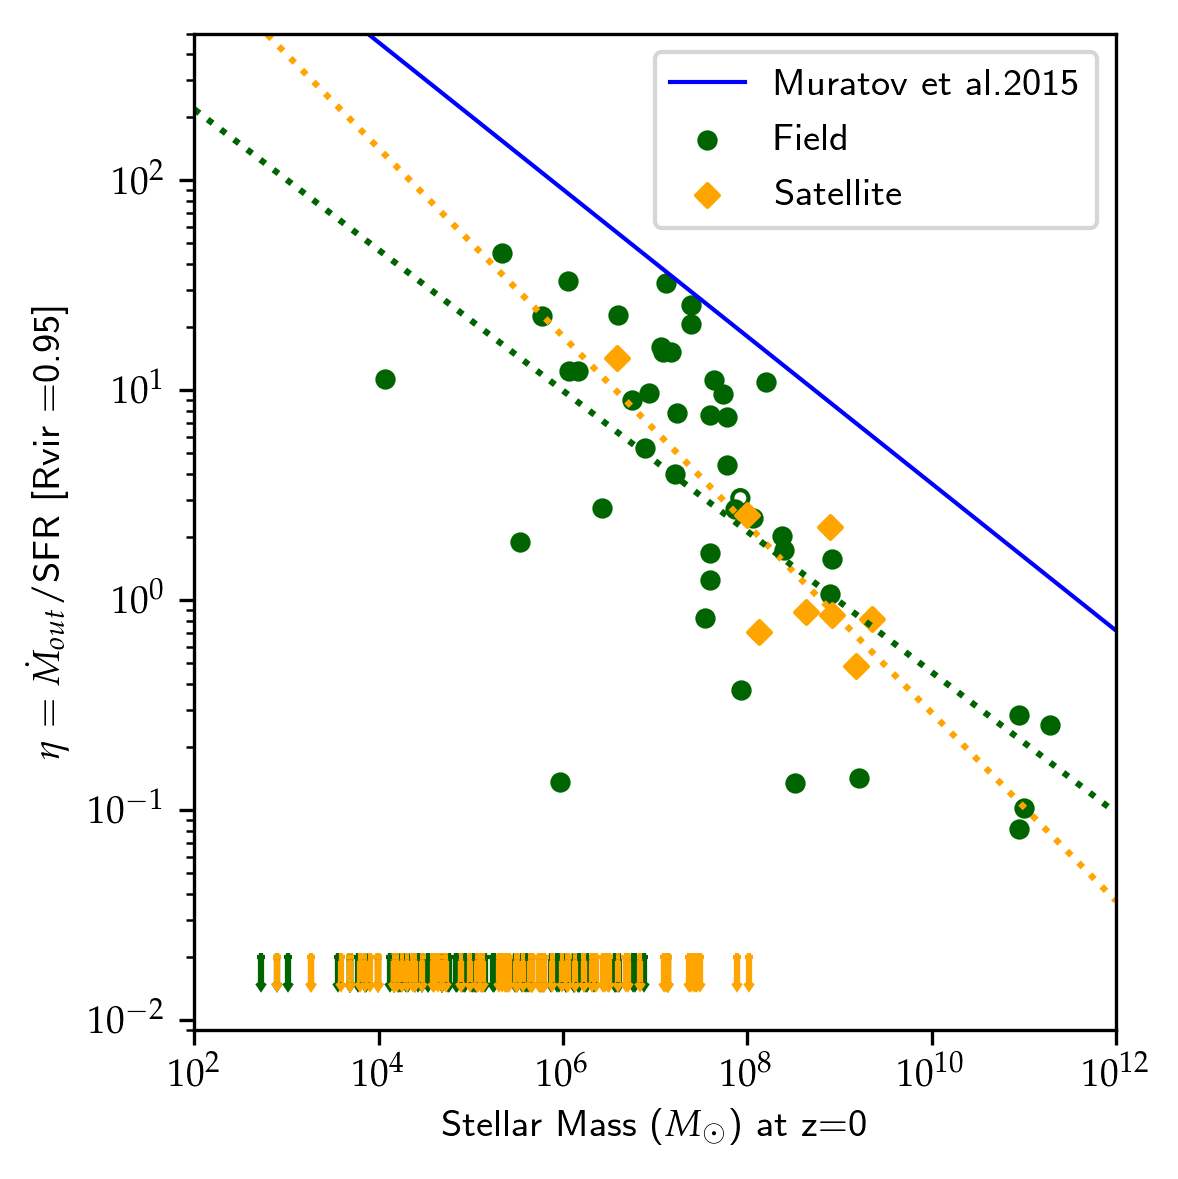

In [56]:
xfit = np.array([100,1e13])
n = 3.6*(xfit/10**10)**(-.35)
plt.figure(figsize=(4,4), dpi=300)
#plt.scatter(data['mass'], n, c='b')
plt.scatter(data['M_star'][f & q], data['G_outflow_0'][q & f]/data['SFR'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], data['G_outflow_0'][q & s]/data['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(data['M_star'][u & f], data['G_outflow_0'][u & f]/data['SFR'][u & f], c='darkgreen', label='Field', s=15)
plt.scatter(data['M_star'][u & s], data['G_outflow_0'][u & s]/data['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)

ng = np.array(data['G_outflow_0']==0)
g = np.array(data['G_outflow_0']>0)
fm = np.array(data['M_star'][f & ng])
sm = np.array(data['M_star'][s & ng])
stfu = np.array(data['SFR']>0)
plt.errorbar(fm,2e-2 + (fm*0),xerr=0.1,yerr=.005, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,2e-2 + (sm*0),xerr=0.1,yerr=.005,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.plot(xfit, n, c='b', linewidth='1', label='Muratov et al.2015')

xs = np.log10(np.array(data['M_star'][g & s & stfu], dtype=float))
ys = np.log10(data['G_outflow_0'][g & s & stfu]/data['SFR'][g & s & stfu])
fus =np.poly1d(np.polyfit(xs, ys, 1))
xsnew = np.linspace(2,12, 50)
plt.plot(10**xsnew, 10**fus(xsnew), c='orange', linestyle=':')
xf = np.log10(np.array(data['M_star'][g & f & stfu], dtype=float))
yf = np.log10(data['G_outflow_0'][g & f & stfu]/data['SFR'][g & f & stfu])
fuf =np.poly1d(np.polyfit(xf, yf, 1))
xfnew = np.linspace(2,12, 50)
plt.plot(10**xfnew, 10**fuf(xfnew), c='darkgreen', linestyle=':')

plt.legend()
plt.loglog()
plt.ylim(9e-3, 5e2)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
plt.ylabel(r'$\eta = \dot{M}_{out}/$SFR [Rvir =0.95]')
#plt.title('Power Law Fit Muratov 0.95', size=20)
plt.tight_layout()
plt.savefig('C1.png', dpi=300)

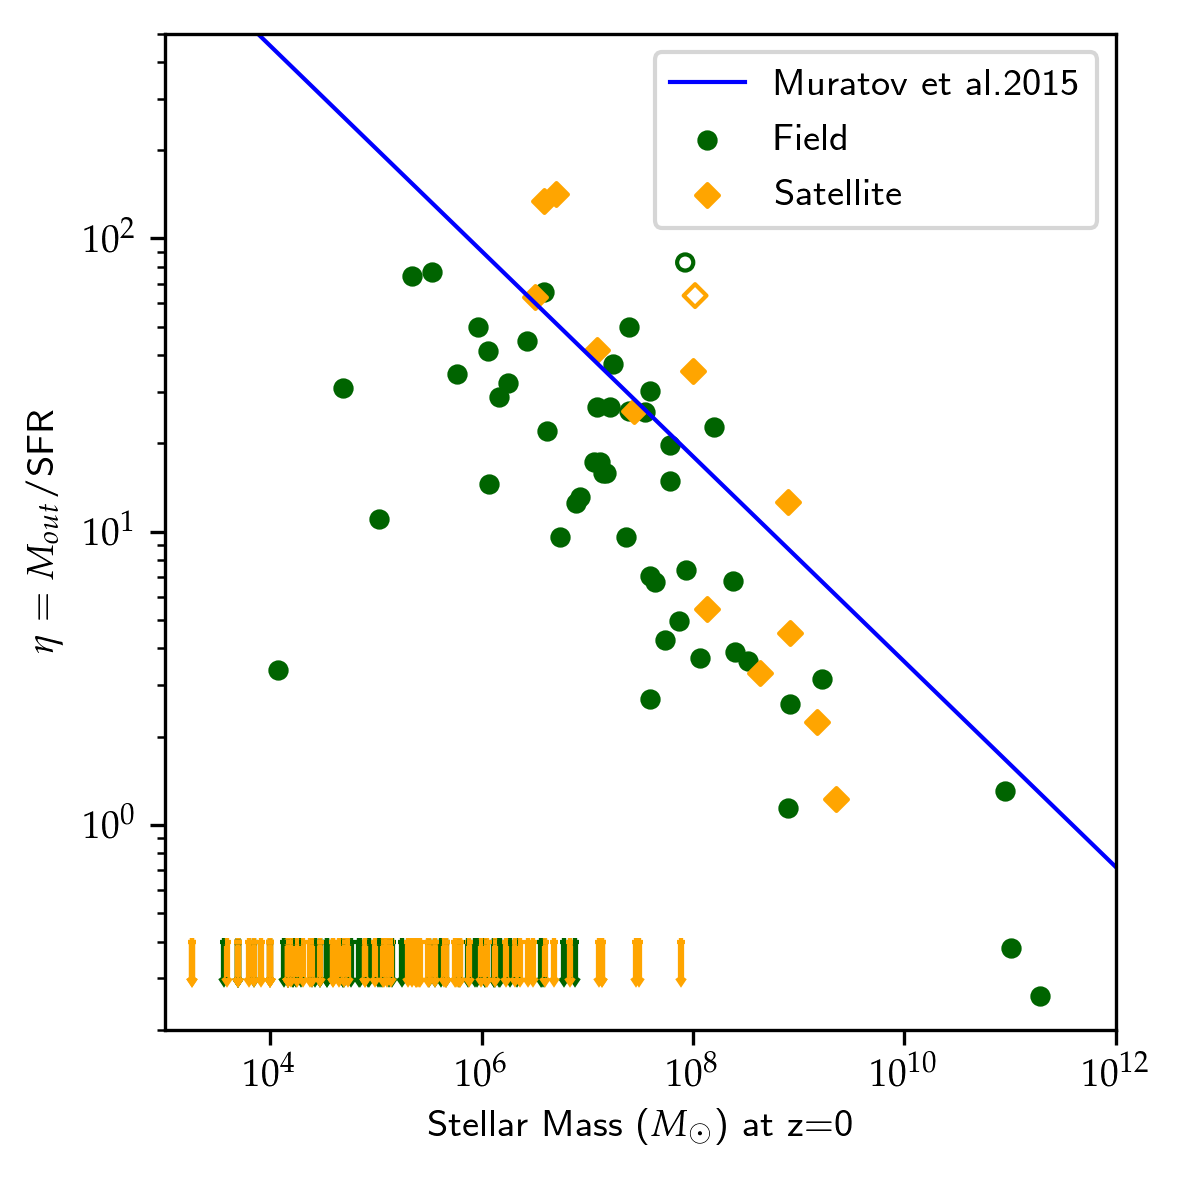

In [11]:
#Plot N value vs Stellar Mass
# EQ
xfit = np.array([100,1e13])
n = 3.6*(xfit/10**10)**(-.35)    #unitlessRogue['G_outflow_1.5']
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][q & f], data['G_outflow_2.5'][q & f]/data['SFR'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][q & s], data['G_outflow_2.5'][q & s]/data['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(data['M_star'][u & f], data['G_outflow_2.5'][u & f]/data['SFR'][u & f], c='darkgreen', label='Field', s=15)
plt.scatter(data['M_star'][u & s], data['G_outflow_2.5'][u & s]/data['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)

ng = np.array(data['G_outflow_2.5']==0)
fm = np.array(data['M_star'][f & ng])
sm = np.array(data['M_star'][s & ng])

plt.errorbar(fm,.4 + (fm*0),xerr=0.1,yerr=.1, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,.4+(sm*0),xerr=0.1,yerr=.1,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.plot(xfit, n, c='b', linewidth='1', label='Muratov et al.2015')

plt.legend()
plt.loglog()
plt.ylim(.2, 5e2)
plt.xlim(1e3, 1e12)
plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
plt.ylabel(r'$\eta = M_{out}/$SFR')
plt.tight_layout()
#plt.title('Power Law Fit Muratov 0.25', size=20)

plt.savefig('B.png', dpi=300)

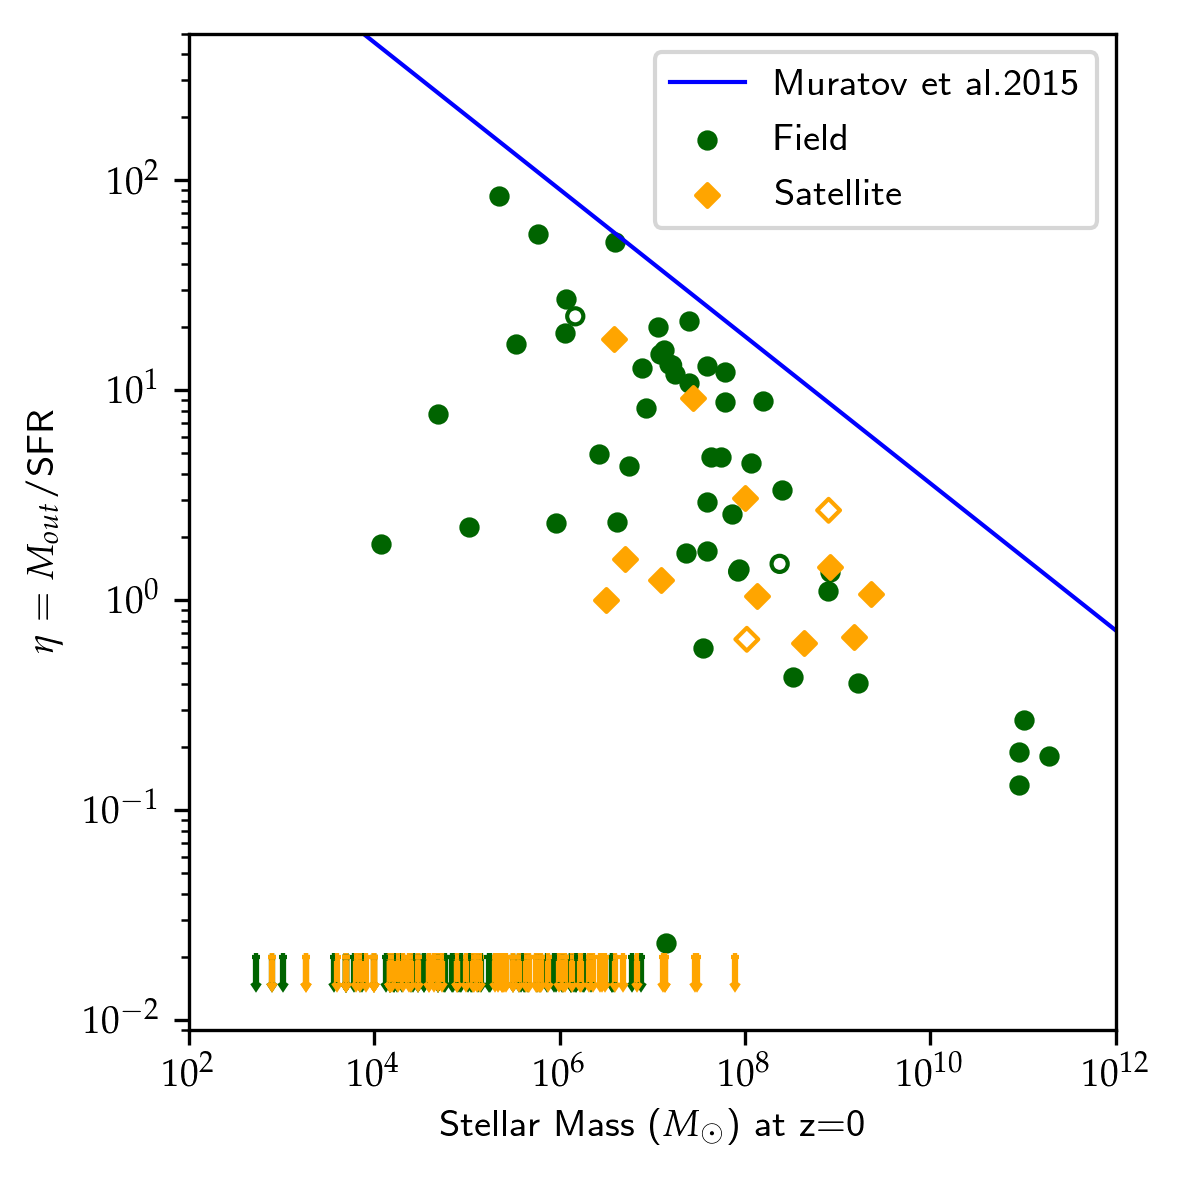

In [11]:
xfit = np.array([100,1e13])
n = 3.6*(xfit/10**10)**(-.35)
plt.figure(figsize=(4,4), dpi=300)
#plt.scatter(data['mass'], n, c='b')
plt.scatter(data['M_star'][f & q], data['G_outflow_0'][q & f]/data['SFR'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], data['G_outflow_0'][q & s]/data['SFR'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(data['M_star'][u & f], data['G_outflow_0'][u & f]/data['SFR'][u & f], c='darkgreen', label='Field', s=15)
plt.scatter(data['M_star'][u & s], data['G_outflow_0'][u & s]/data['SFR'][u & s], c='orange', label='Satellite', marker='D', s=15)

ng = np.array(data['G_outflow_0']==0)
fm = np.array(data['M_star'][f & ng])
sm = np.array(data['M_star'][s & ng])

plt.errorbar(fm,2e-2 + (fm*0),xerr=0.1,yerr=.005, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,2e-2 + (sm*0),xerr=0.1,yerr=.005,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.plot(xfit, n, c='b', linewidth='1', label='Muratov et al.2015')
plt.legend()
plt.loglog()
plt.ylim(9e-3, 5e2)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass ($M_{\odot}$) at z=0')
plt.ylabel(r'$\eta = M_{out}/$SFR')
#plt.title('Power Law Fit Muratov 0.95', size=20)
plt.tight_layout()
plt.savefig('C.png', dpi=300)

satellites  
-3.507 x + 6.717
fields  
-2.448 x + 5.022


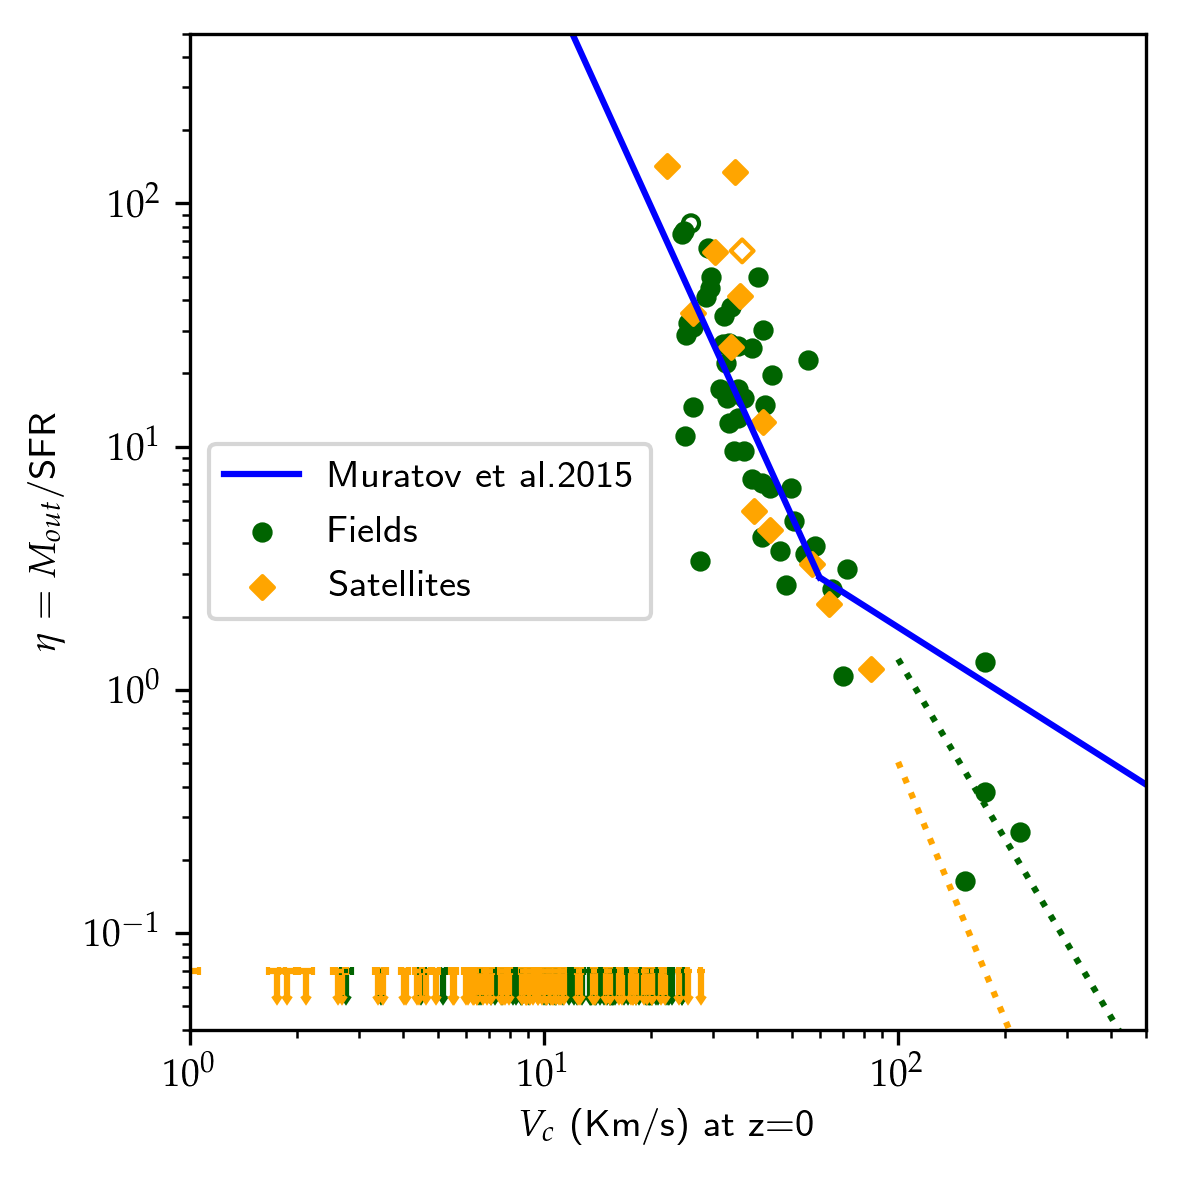

In [43]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[f & q], data['G_outflow_2.5'][f & q]/data['SFR'][f & q], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[s & q], data['G_outflow_2.5'][s & q]/data['SFR'][s & q], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(V_c[f & u], data['G_outflow_2.5'][u & f]/data['SFR'][u & f], c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[s & u], data['G_outflow_2.5'][u & s]/data['SFR'][u & s], c='orange', label='Satellites', marker='D', s=15)

ng = np.array(data['G_outflow_2.5']==0)

plt.errorbar(V_c[ng & f],7e-2+(V_c[ng & f]*0),xerr=0.1,yerr=.015, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],7e-2+(V_c[ng & s]*0),xerr=0.1,yerr=.015, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

x1 = [10.363, 60]
x2 = [60, 513.99]
y1 = [799.702, 2.9]
y2 = [2.9, .399]
plt.plot(x1,y1, 'b-', label='Muratov et al.2015')
plt.legend()
plt.plot(x2, y2, 'b-')

ng = np.array(data['G_outflow_0']==0)
g = np.array(data['G_outflow_0']>0)
stfu = np.array(data['SFR']>0)

xs = np.log10(np.array(V_c[g & s & stfu], dtype=float))
ys = np.log10(data['G_outflow_2.5'][g & s & stfu]/data['SFR'][g & s & stfu])
fus =np.poly1d(np.polyfit(xs, ys, 1))
xsnew = np.linspace(2,12, 50)
plt.plot(10**xsnew, 10**fus(xsnew), c='orange', linestyle=':')
xf = np.log10(np.array(V_c[g & f & stfu], dtype=float))
yf = np.log10(data['G_outflow_2.5'][g & f & stfu]/data['SFR'][g & f & stfu])
fuf =np.poly1d(np.polyfit(xf, yf, 1))
xfnew = np.linspace(2,12, 50)
plt.plot(10**xfnew, 10**fuf(xfnew), c='darkgreen', linestyle=':')

print('satellites',fus)
print('fields',fuf)

plt.loglog()
plt.ylim(4e-2, 5e2)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$\eta = M_{out}$/SFR')
#plt.title('Broken Power Law Fit Muratov 0.25', size=20)
plt.tight_layout()
plt.savefig('D.png', dpi=300)
plt.show()

satellites  
-1.774 x + 3.1
fields  
-2.133 x + 3.965


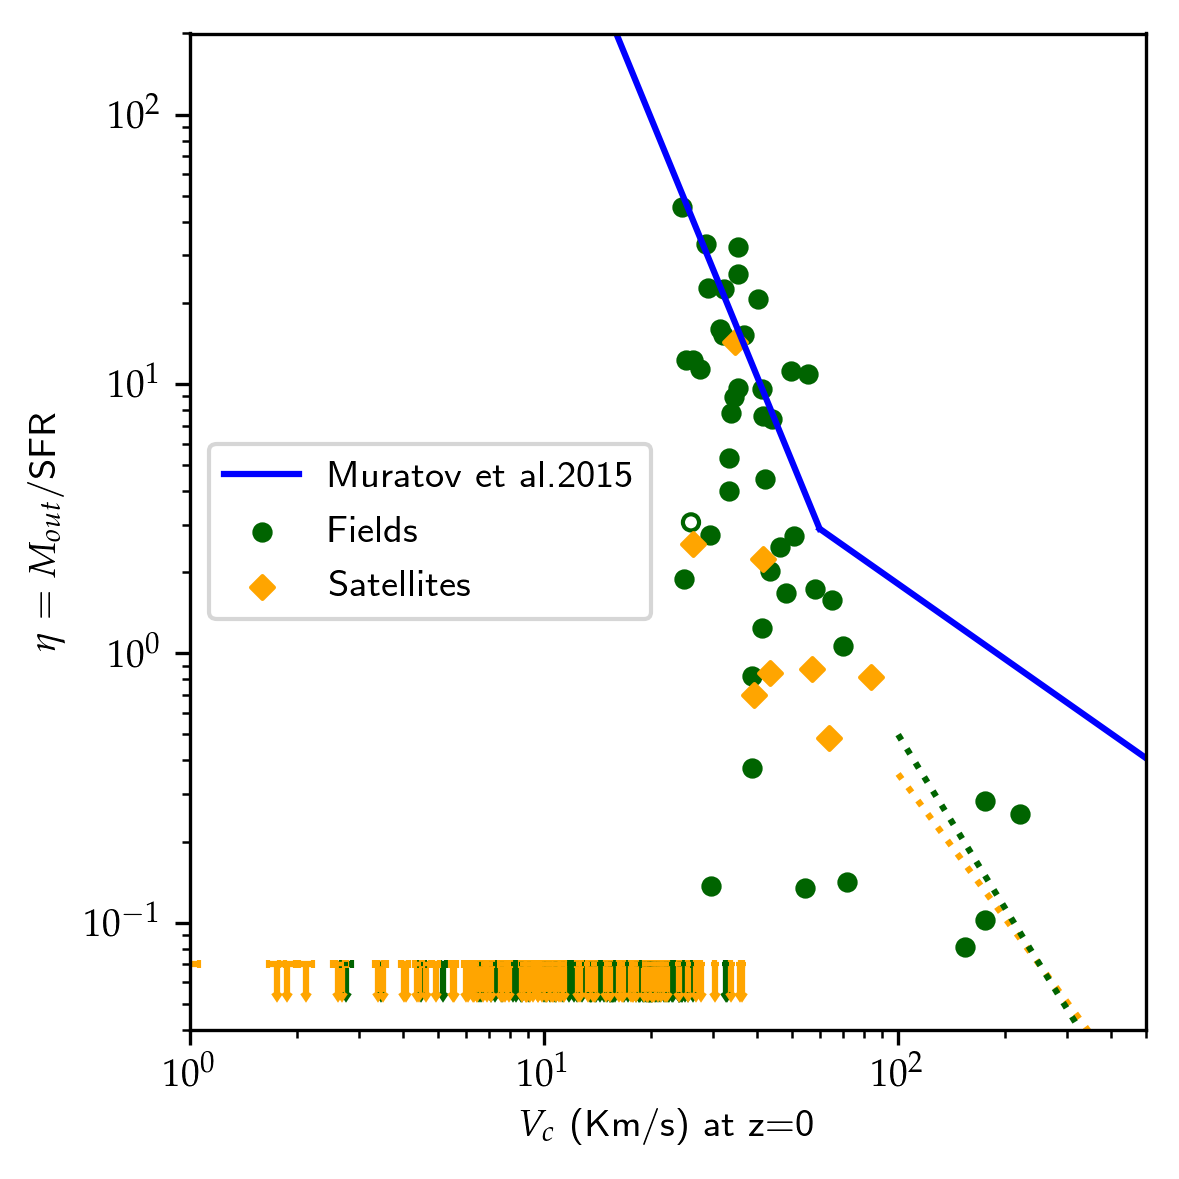

In [44]:
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[f & q], data['G_outflow_0'][f & q]/data['SFR'][f & q], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[s & q], data['G_outflow_0'][s & q]/data['SFR'][s & q], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.scatter(V_c[f & u], data['G_outflow_0'][u & f]/data['SFR'][u & f], c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[s & u], data['G_outflow_0'][u & s]/data['SFR'][u & s], c='orange', label='Satellites', marker='D', s=15)

ng = np.array(data['G_outflow_0']==0)

plt.errorbar(V_c[ng & f],7e-2+(V_c[ng & f]*0),xerr=0.1,yerr=.015, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],7e-2+(V_c[ng & s]*0),xerr=0.1,yerr=.015, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

x1 = [10.363, 60]
x2 = [60, 513.99]
y1 = [799.702, 2.9]
y2 = [2.9, .399]
plt.plot(x1,y1, 'b-', label='Muratov et al.2015')
plt.legend()
plt.plot(x2, y2, 'b-')

xs = np.log10(np.array(V_c[g & s & stfu], dtype=float))
ys = np.log10(data['G_outflow_0'][g & s & stfu]/data['SFR'][g & s & stfu])
fus =np.poly1d(np.polyfit(xs, ys, 1))
xsnew = np.linspace(2,12, 50)
plt.plot(10**xsnew, 10**fus(xsnew), c='orange', linestyle=':')
xf = np.log10(np.array(V_c[g & f & stfu], dtype=float))
yf = np.log10(data['G_outflow_0'][g & f & stfu]/data['SFR'][g & f & stfu])
fuf =np.poly1d(np.polyfit(xf, yf, 1))
xfnew = np.linspace(2,12, 50)
plt.plot(10**xfnew, 10**fuf(xfnew), c='darkgreen', linestyle=':')

print('satellites',fus)
print('fields',fuf)


plt.loglog()
plt.ylim(4e-2, 2e2)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$\eta = M_{out}$/SFR')
#plt.title('Broken Power Law Fit Muratov 0.25', size=20)
plt.tight_layout()
plt.savefig('E.png', dpi=300)
plt.show()

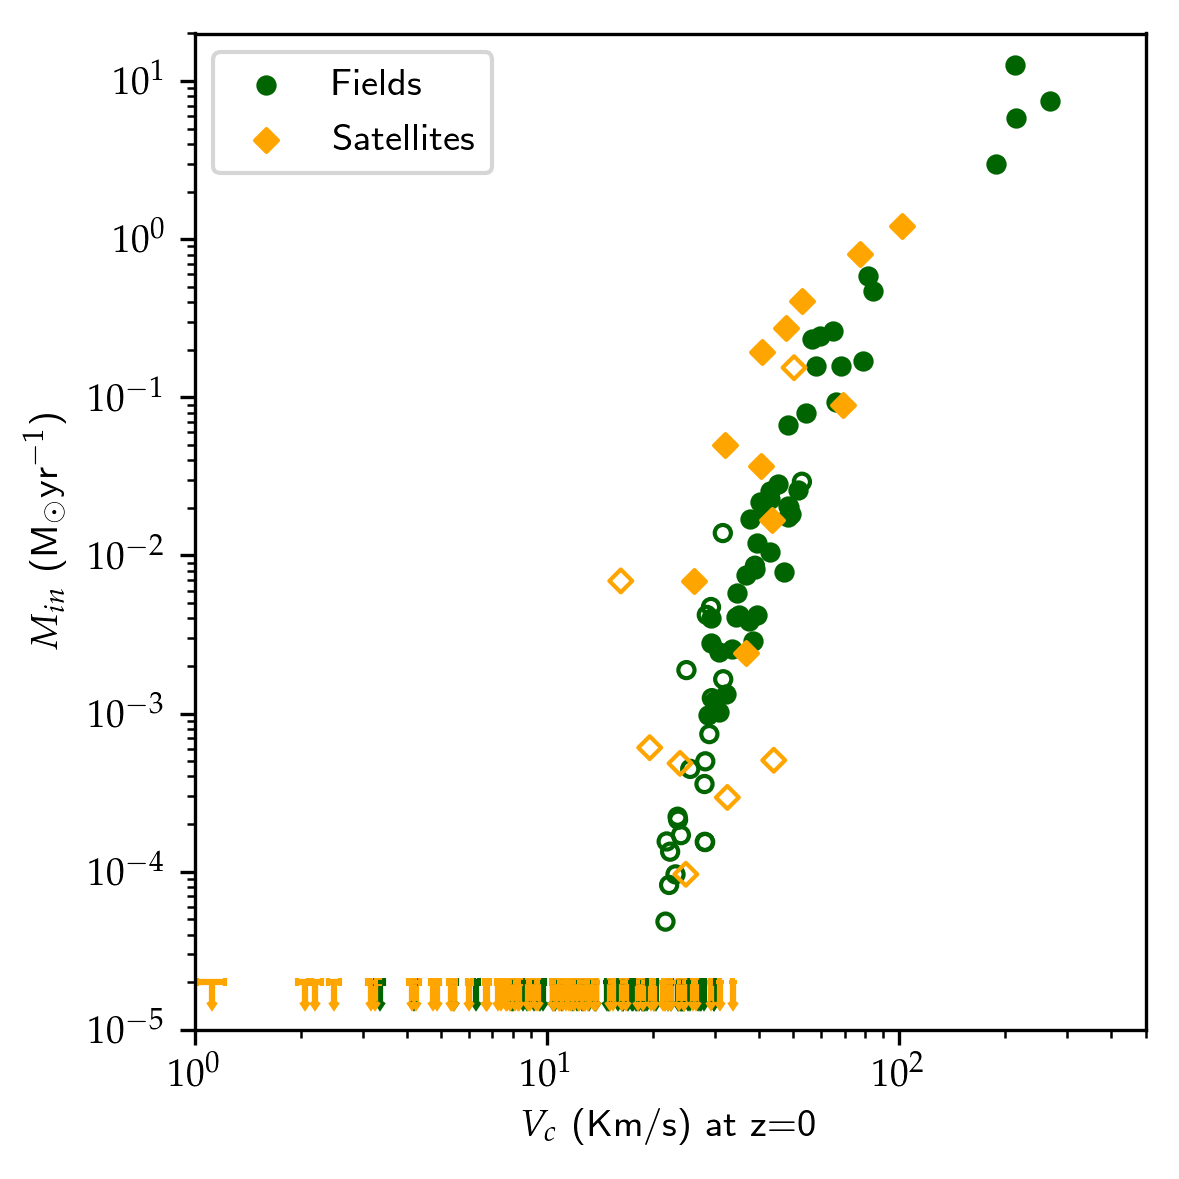

In [14]:
###Inflow Rvir .25

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[f & u], abs(data['G_inflow_2.5'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[s & u], abs(data['G_inflow_2.5'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(V_c[f & q], abs(data['G_inflow_2.5'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[s & q], abs(data['G_inflow_2.5'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_inflow_2.5']==0)

plt.errorbar(V_c[ng & f],2e-5+(V_c[ng & f]*0),xerr=0.1,yerr=5e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],2e-5+(V_c[ng & s]*0),xerr=0.1,yerr=5e-6, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-5, 20)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$M_{in}$ (M$_{\odot}$yr$^{-1}$)')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('F', dpi=300)
plt.show()

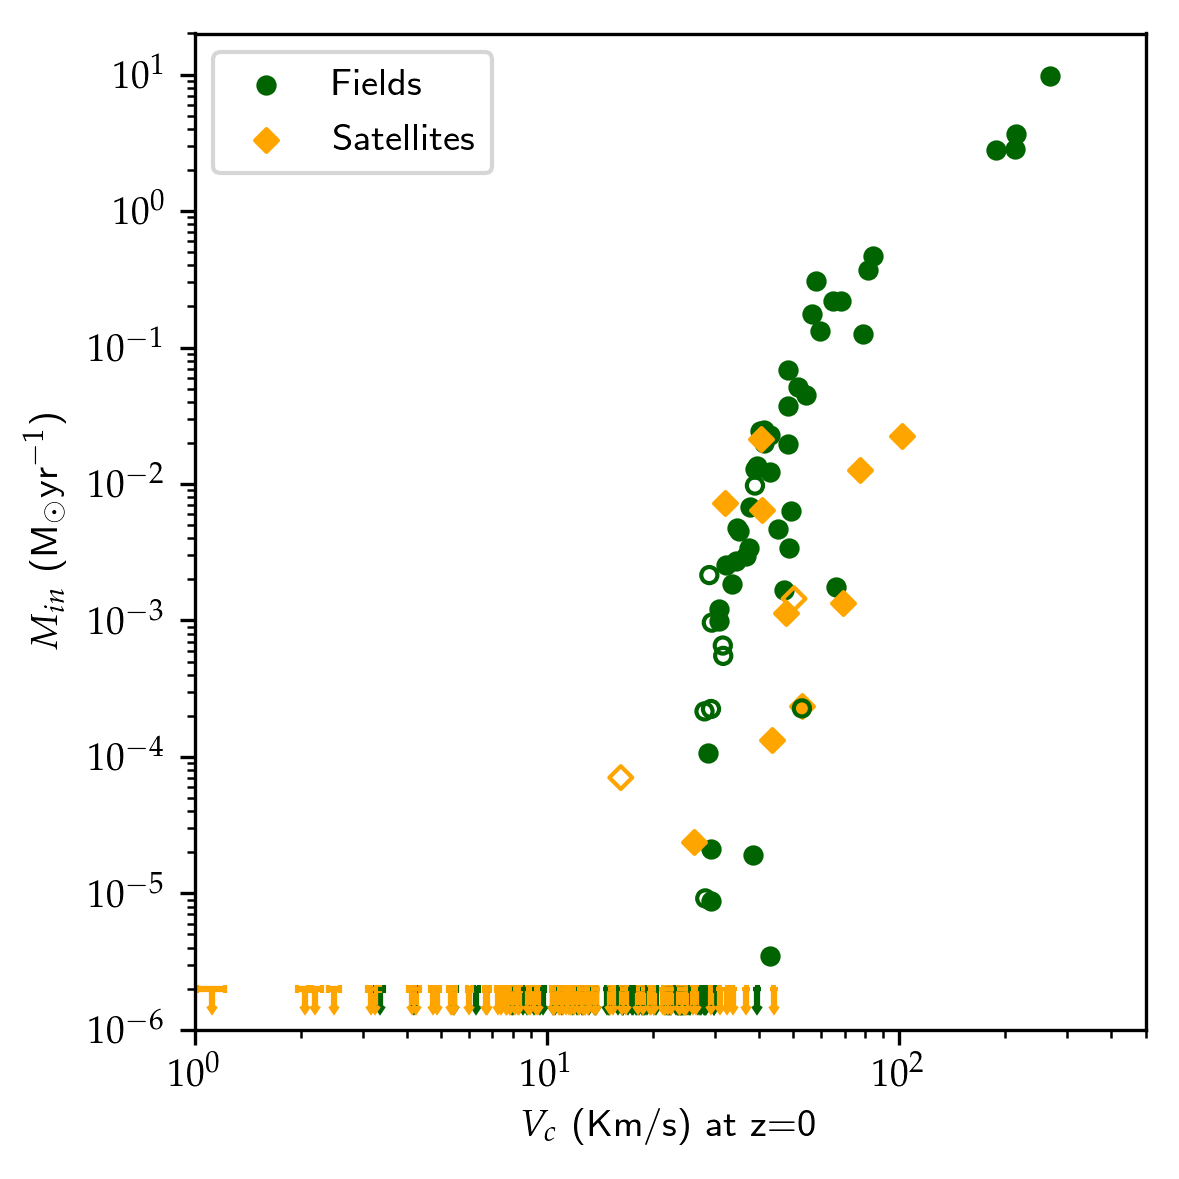

In [15]:
###Inflow Rvir .95

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[f & u], abs(data['G_inflow_0'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[s & u], abs(data['G_inflow_0'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(V_c[f & q], abs(data['G_inflow_0'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[s & q], abs(data['G_inflow_0'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_inflow_0']==0)

plt.errorbar(V_c[ng & f],2e-6+(V_c[ng & f]*0),xerr=0.1,yerr=5e-7, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],2e-6+(V_c[ng & s]*0),xerr=0.1,yerr=5e-7, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-6, 20)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$M_{in}$ (M$_{\odot}$yr$^{-1}$)')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('G', dpi=300)
plt.show()

In [73]:
len(data['M_star'][ng & f & u])

8

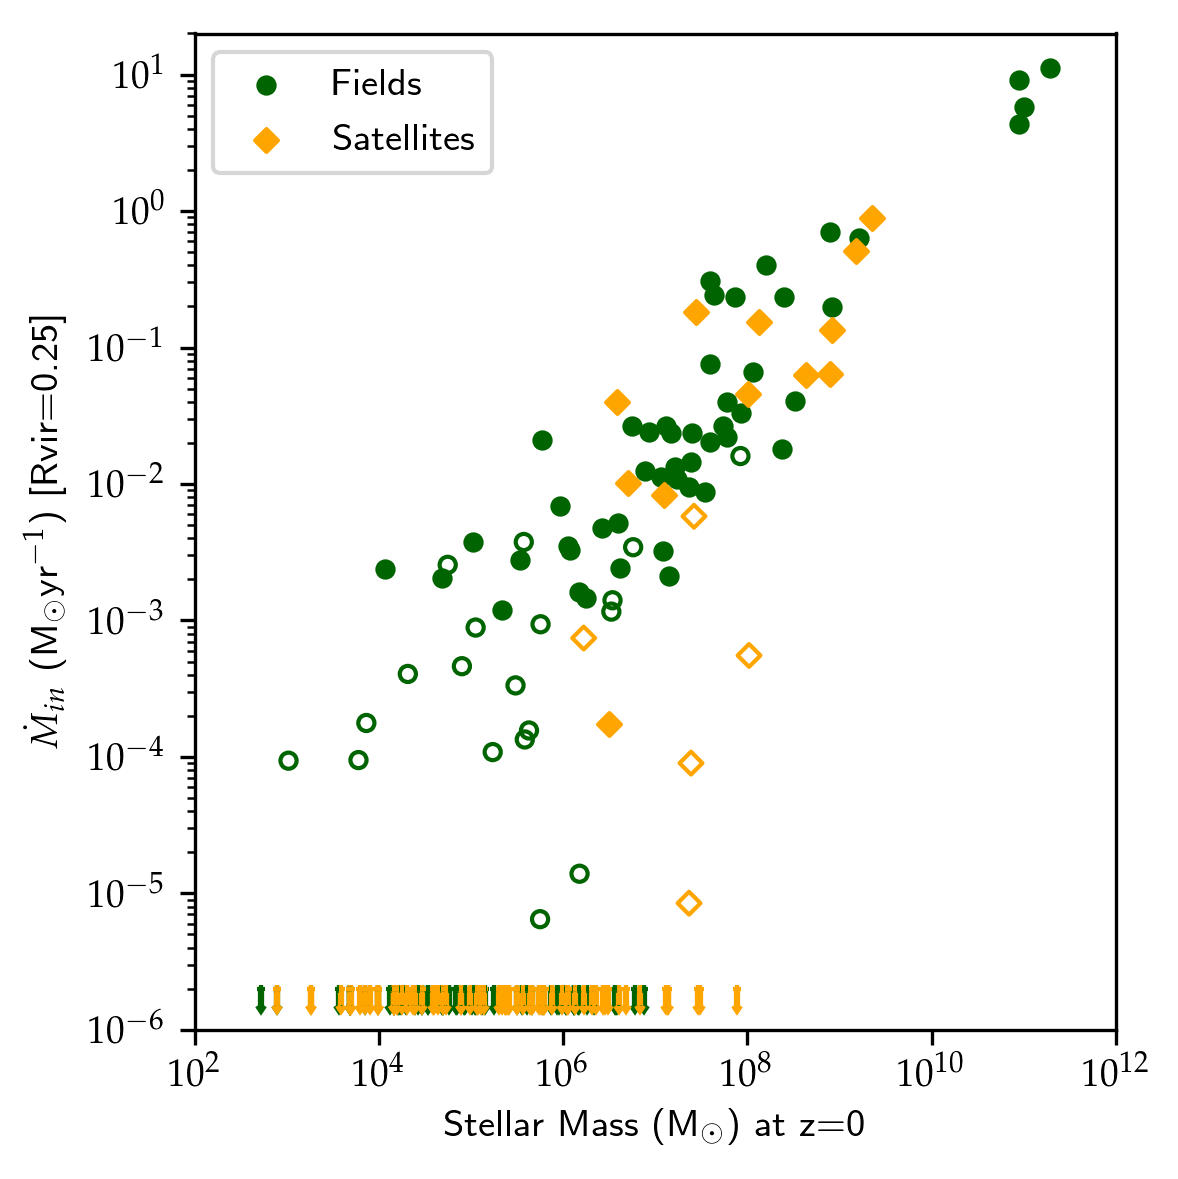

In [62]:
###Inflow Rvir .25

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][u & f], abs(data['G_inflow_2.5'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(data['M_star'][u & s], abs(data['G_inflow_2.5'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(data['M_star'][f & q], abs(data['G_inflow_2.5'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], abs(data['G_inflow_2.5'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_inflow_2.5']==0)
fm = np.array(data['M_star'][ng & f])
sm = np.array(data['M_star'][ng & s])

plt.errorbar(fm,2e-6 + (fm*0),xerr=0.1,yerr=.5e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,2e-6+(sm*0),xerr=0.1,yerr=.5e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-6, 20)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$\dot{M}_{in}$ (M$_{\odot}$yr$^{-1}$) [Rvir=0.25]')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('J', dpi=300)
plt.show()

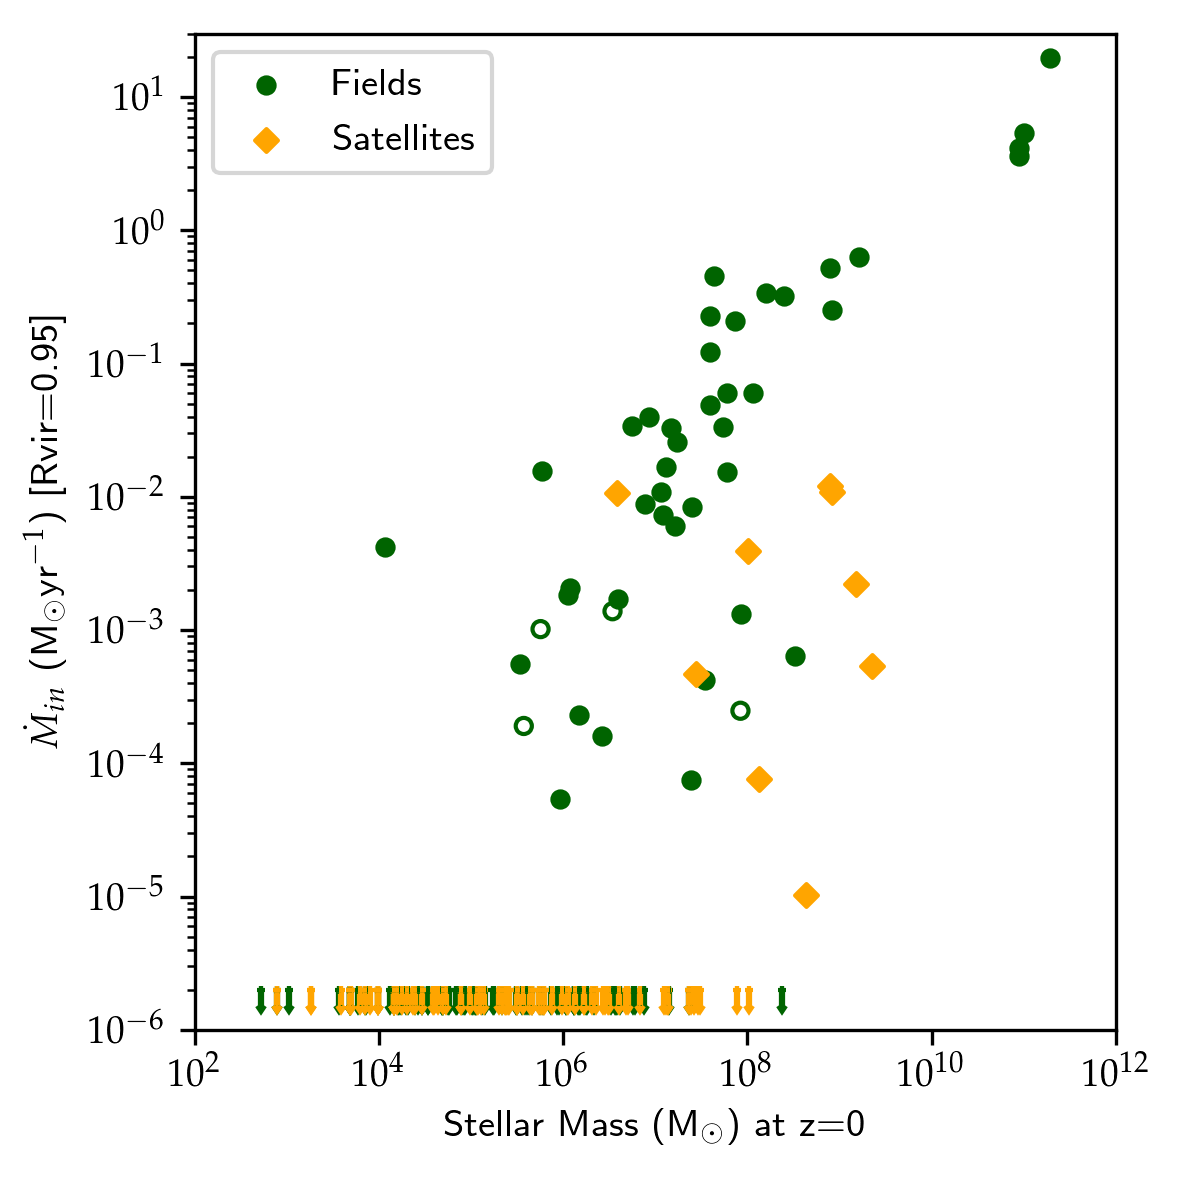

In [68]:
###Inflow Rvir .25

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][u & f], abs(data['G_inflow_0'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(data['M_star'][u & s], abs(data['G_inflow_0'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(data['M_star'][f & q], abs(data['G_inflow_0'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], abs(data['G_inflow_0'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_inflow_0']==0)
fm = np.array(data['M_star'][ng & f])
sm = np.array(data['M_star'][ng & s])

plt.errorbar(fm,2e-6 + (fm*0),xerr=0.1,yerr=.5e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,2e-6+(sm*0),xerr=0.1,yerr=.5e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(1e-6, 30)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$\dot{M}_{in}$ (M$_{\odot}$yr$^{-1}$) [Rvir=0.95]')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('K', dpi=300)
plt.show()

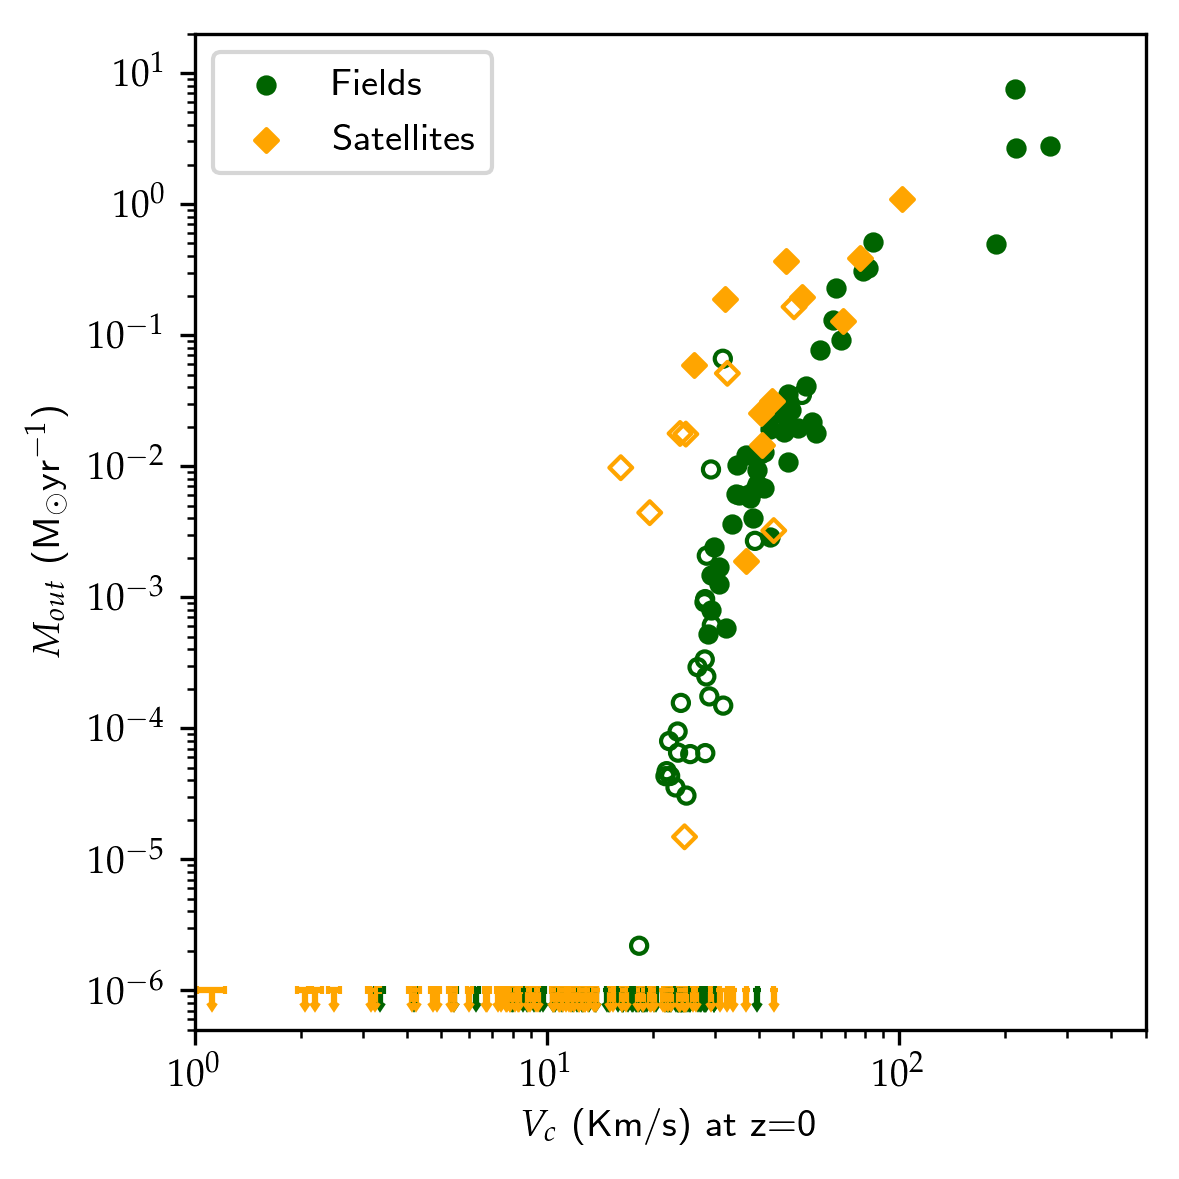

In [18]:
###outflow Rvir .25
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[u & f], data['G_outflow_2.5'][u & f], c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[u & s], data['G_outflow_2.5'][u & s], c='orange', label='Satellites', marker='D', s=15)
plt.scatter(V_c[f & q], data['G_outflow_2.5'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[q & s], data['G_outflow_2.5'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)

plt.errorbar(V_c[ng & f],1e-6+(V_c[ng & f]*0),xerr=0.1,yerr=2e-7, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],1e-6+(V_c[ng & s]*0),xerr=0.1,yerr=2e-7, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.legend()
plt.loglog()
plt.ylim(5e-7, 20)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$M_{out}$ (M$_{\odot}$yr$^{-1}$)')
plt.tight_layout()
plt.savefig('H', dpi=300)
plt.show()

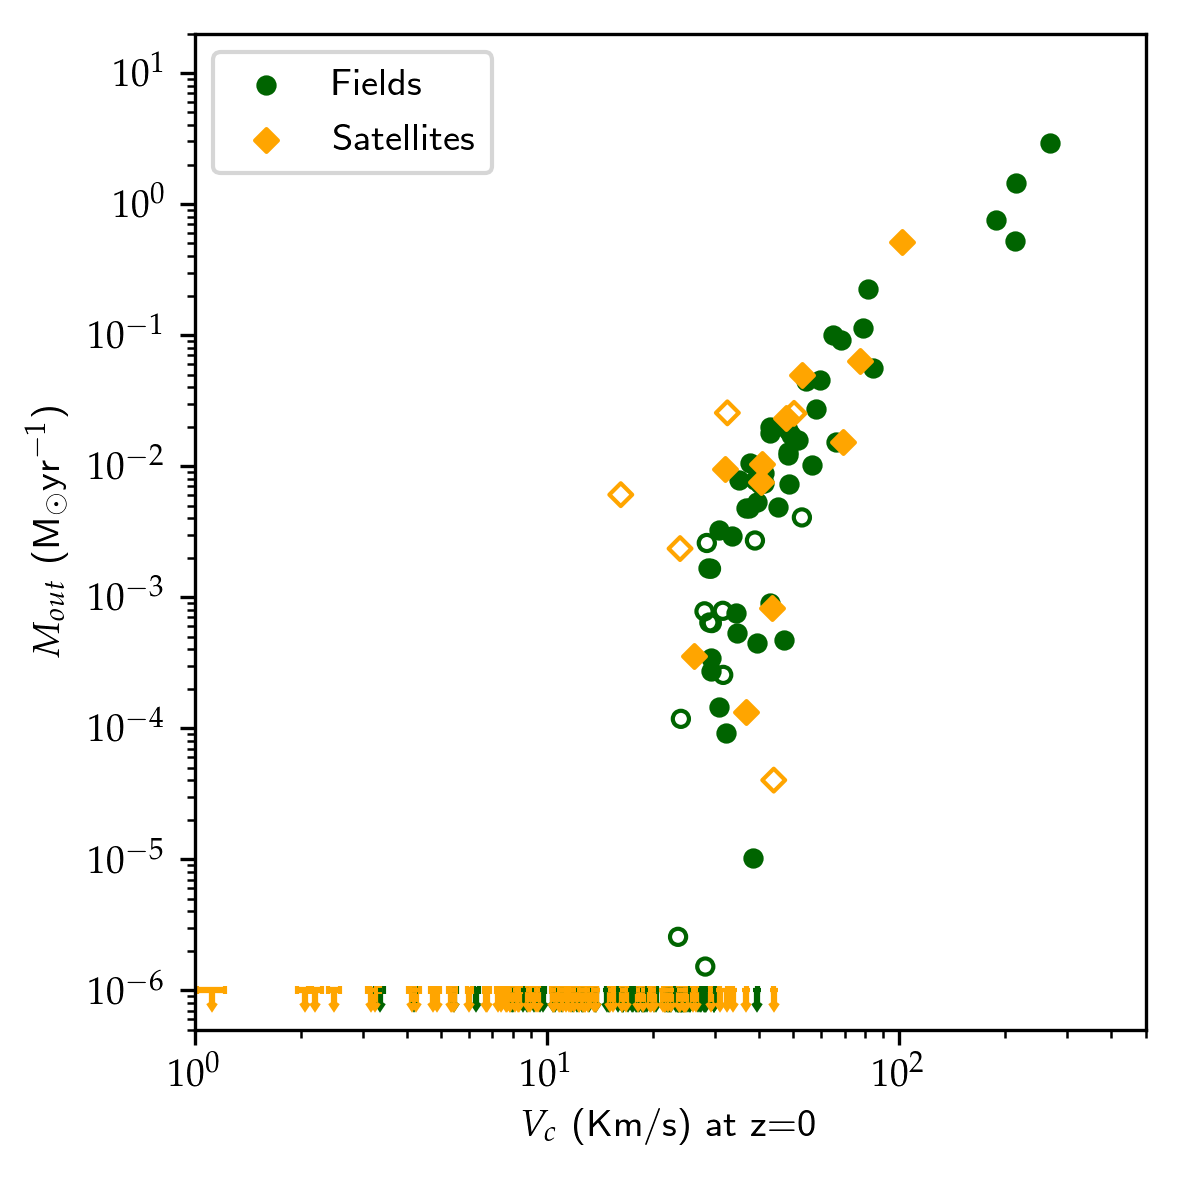

In [19]:
###outflow Rvir .25
plt.figure(figsize=(4,4), dpi=300)
plt.scatter(V_c[u & f], data['G_outflow_0'][u & f], c='darkgreen', label='Fields', s=15)
plt.scatter(V_c[u & s], data['G_outflow_0'][u & s], c='orange', label='Satellites', marker='D', s=15)
plt.scatter(V_c[f & q], data['G_outflow_0'][q & f], facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(V_c[q & s], data['G_outflow_0'][q & s], facecolors='none', edgecolors='orange', label=None, marker='D', s=15)

plt.errorbar(V_c[ng & f],1e-6+(V_c[ng & f]*0),xerr=0.1,yerr=2e-7, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(V_c[ng & s],1e-6+(V_c[ng & s]*0),xerr=0.1,yerr=2e-7, color = "orange",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.legend()
plt.loglog()
plt.ylim(5e-7, 20)
plt.xlim(1, 5e2)
plt.xlabel(r'$V_{c}$ (Km/s) at z=0')
plt.ylabel(r'$M_{out}$ (M$_{\odot}$yr$^{-1}$)')
plt.tight_layout()
plt.savefig('I', dpi=300)
plt.show()

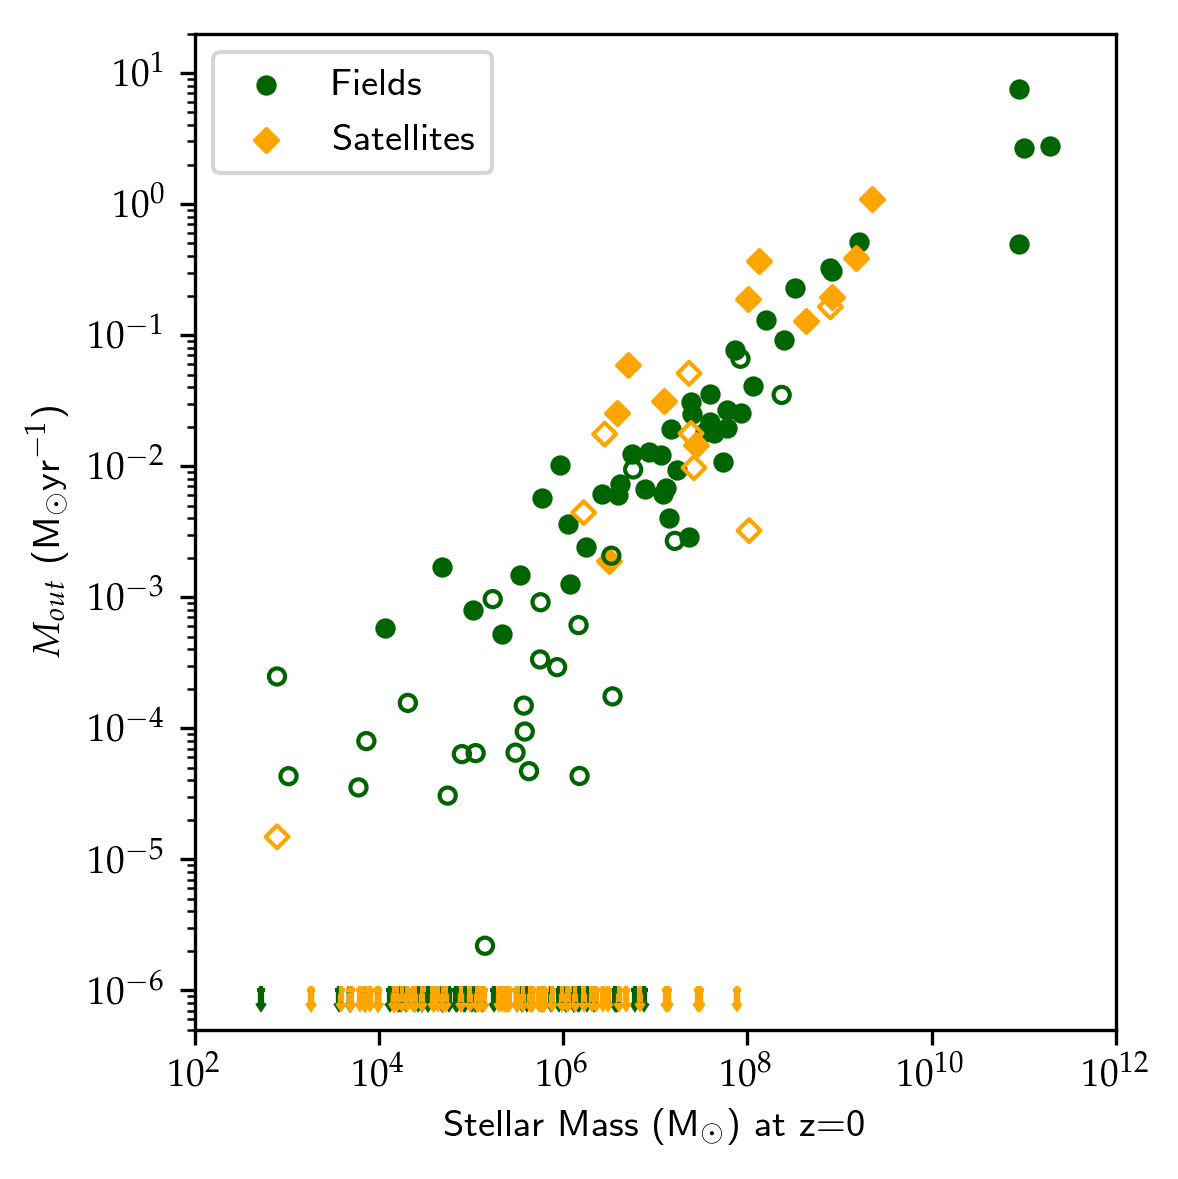

In [28]:
###Inflow Rvir .25

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][u & f], abs(data['G_outflow_2.5'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(data['M_star'][u & s], abs(data['G_outflow_2.5'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(data['M_star'][f & q], abs(data['G_outflow_2.5'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], abs(data['G_outflow_2.5'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_outflow_2.5']==0)
fm = np.array(data['M_star'][ng & f])
sm = np.array(data['M_star'][ng & s])

plt.errorbar(fm,1e-6 + (fm*0),xerr=0.1,yerr=.2e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,1e-6+(sm*0),xerr=0.1,yerr=.2e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(5e-7, 20)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$M_{out}$ (M$_{\odot}$yr$^{-1}$)')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('L', dpi=300)
plt.show()

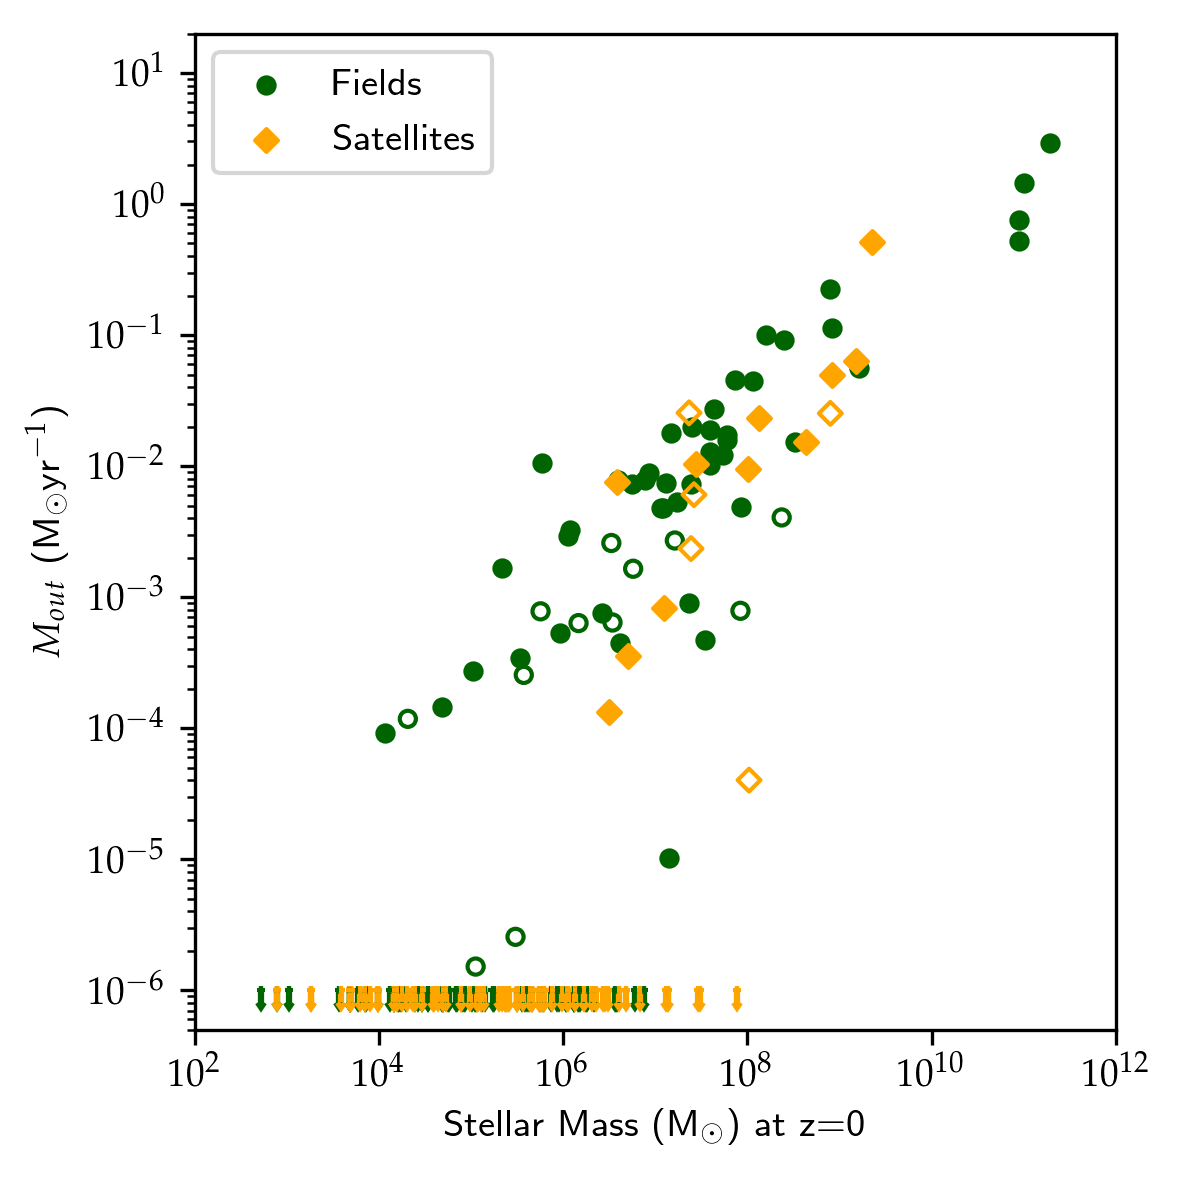

In [27]:
###Inflow Rvir .25

plt.figure(figsize=(4,4), dpi=300)
plt.scatter(data['M_star'][u & f], abs(data['G_outflow_0'][u & f]), c='darkgreen', label='Fields', s=15)
plt.scatter(data['M_star'][u & s], abs(data['G_outflow_0'][u & s]), c='orange', label='Satellites', marker='D', s=15)
plt.scatter(data['M_star'][f & q], abs(data['G_outflow_0'][q & f]), facecolors='none', edgecolors='darkgreen', label=None, s=15)
plt.scatter(data['M_star'][s & q], abs(data['G_outflow_0'][q & s]), facecolors='none', edgecolors='orange', label=None, marker='D', s=15)
plt.legend()

ng = np.array(data['G_outflow_0']==0)
fm = np.array(data['M_star'][ng & f])
sm = np.array(data['M_star'][ng & s])

plt.errorbar(fm,1e-6 + (fm*0),xerr=0.1,yerr=.2e-6, color = "darkgreen",fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)
plt.errorbar(sm,1e-6+(sm*0),xerr=0.1,yerr=.2e-6,color = "orange", fmt="_",zorder = 1,ms = 1,uplims=True,capsize = 1)

plt.loglog()
plt.ylim(5e-7, 20)
plt.xlim(1e2, 1e12)
plt.xlabel(r'Stellar Mass (M$_{\odot}$) at z=0')
plt.ylabel(r'$M_{out}$ (M$_{\odot}$yr$^{-1}$)')
#plt.title('Evidence of Strangulation 0.25 Rvir', size=20)
plt.legend()
plt.tight_layout()
plt.savefig('M', dpi=300)
plt.show()

Muratov comparison :
2 takeaways - try to see if there is a stronger correlation with the field than with the satellite since those are more similar to Murratov paper galaxies, super strong outliers should be examined
the physics used in our simulations are very different so our resutls are more similar than one woudl expect. 
observation = one of the poewr laws fits better than the other, could be related to mass distribution, our simulation contains haloes with (MORE OR LESS?) stellar mass relative to halo mass

# GAS TEMP

In [22]:
def distance_to_nearest_host(data):
    distances = []
    hostrvirs = []
    for i in range(len(data)):
        s = data['sim'].tolist()[i]

#         if data['hostDist']>0:
#             hdist = data['hostDist']
    
        if s=='h148' or s=='h229' or s=='h242' or s=='h329': # if sat simulation, find distance to halo 1
            h1dist = data['h1dist'].tolist()[i]*0.6776942783267969
            distances.append(h1dist)
            h1rvir = data['Rvir'][(data.sim==s) & (data.haloid==1)].tolist()[0]*0.6776942783267969
            hostrvirs.append(h1rvir)

        else: # if field simulation, find distance to nearest massive DM halo (currently > 1e12.5 Msol)
            if s=='cptmarvel':
                path = '/home/akinshol/Data/Sims/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096.dir/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096'

            if s=='elektra':
                path = '/home/akinshol/Data/Sims/elektra.cosmo25cmb.4096g5HbwK1BH/elektra.cosmo25cmb.4096g5HbwK1BH.004096.dir/elektra.cosmo25cmb.4096g5HbwK1BH.004096'

            if s=='rogue':
                path = '/home/akinshol/Data/Sims/rogue.cosmo25cmb.4096g5HbwK1BH/rogue.cosmo25cmb.4096g5HbwK1BH.00409plt.scatter(datat4['mstar'], datat4['outflow_23']/datat4['sfr'], c=datat4['time'], cmap='plasma', label=None, s=15)6.dir/rogue.cosmo25cmb.4096g5HbwK1BH.004096'

            if s=='storm':
                path = '/home/akinshol/Data/Sims/storm.cosmo25cmb.4096g5HbwK1BH/storm.cosmo25cmb.4096g5HbwK1BH.004096/storm.cosmo25cmb.4096g5HbwK1BH.004096'

            coords = []
            with open(path+'.coords','rb') as f:
                while True:
                    try:
                        coords.append(pickle.load(f,encoding='latin1'))
                    except EOFError:
                        break
            coords = pd.DataFrame(coords)

            threshold = 10**(11.5)

            coords = coords[coords.mass > threshold]

            halocoords = np.array([data['Xc'].tolist()[i],data['Yc'].tolist()[i],data['Zc'].tolist()[i]])

            x = np.array(coords['Xc'])
            y = np.array(coords['Yc'])
            z = np.array(coords['Zc'])
            Rvir = np.array(coords['Rv'])


            c = np.array([x,y,z])
            c = np.transpose(c)
            dist = np.sqrt(np.sum((halocoords-c)**2, axis=1))*0.6776942783267969
            distances.append(np.min(dist))
            hostrvirs.append(Rvir[np.argmin(dist)]*0.6776942783267969)

    return np.array(distances),np.array(hostrvirs)

In [34]:
hdist

NameError: name 'hdist' is not defined

In [23]:
dist, rvir = distance_to_nearest_host(data)
dist = dist/rvir

In [24]:
data1.keys()

Index(['B-V', 'B_mag', 'G_inflow_0', 'G_inflow_1.5', 'G_inflow_2.5',
       'G_outflow_0', 'G_outflow_1.5', 'G_outflow_2.5', 'Gin_T', 'Gout_T',
       'HIgasfrac', 'I_mag', 'M_gas', 'M_star', 'R_mag', 'Rmax', 'Rvir', 'SFR',
       'U_mag', 'V90_Vdisp', 'V_mag', 'Xc', 'Yc', 'Zc', 'a', 'age', 'c', 'c_a',
       'fMhires', 'feh', 'g_temp', 'gasfrac', 'h1dist', 'haloid', 'hostDist',
       'hostHalo', 'hostVirialR', 'id2', 'mHI', 'mass', 'n_gas', 'n_particles',
       'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins', 'tquench', 'zgas',
       'zstar', 'sim'],
      dtype='object')

Text(0.5, 1.0, 'Outflow Temp vs Distance')

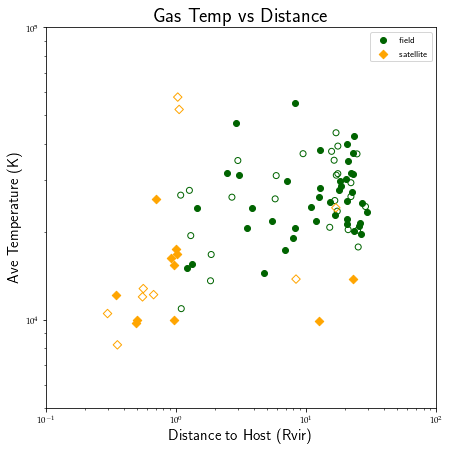

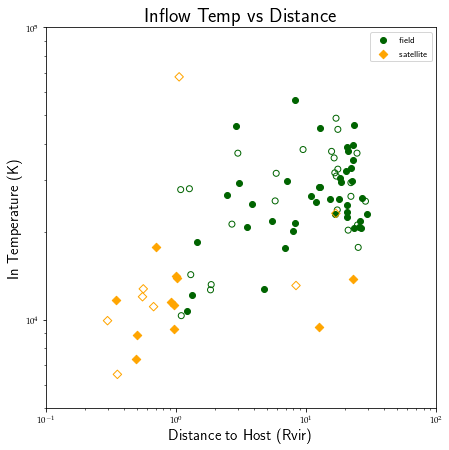

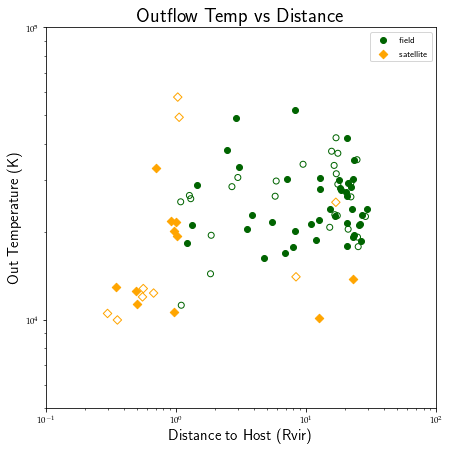

In [25]:
###Average

plt.figure(figsize=(7,7))
plt.scatter(dist[u & f], data['g_temp'][u & f], c='darkgreen', label='field')
plt.scatter(dist[u & s], data['g_temp'][u & s], label='satellite', c='orange', marker='D')
plt.scatter(dist[q & f], data['g_temp'][q & f], facecolors='none', edgecolors='darkgreen', label=None)
plt.scatter(dist[q & s], data['g_temp'][q & s], label=None, facecolors='none', edgecolors='orange', marker='D')
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(5e3, 1e5)
plt.legend()
plt.ylabel('Ave Temperature (K)', size = 15)
plt.xlabel('Distance to Host (Rvir)', size=15)
plt.title('Gas Temp vs Distance', size=20)

###Inflow

plt.figure(figsize=(7,7))
plt.scatter(dist[u & f], data['Gin_T'][u & f], c='darkgreen', label='field')
plt.scatter(dist[u & s], data['Gin_T'][u & s], label='satellite', c='orange', marker='D')
plt.scatter(dist[q & f], data['Gin_T'][q & f], facecolors='none', edgecolors='darkgreen', label=None)
plt.scatter(dist[q & s], data['Gin_T'][q & s], label=None, facecolors='none', edgecolors='orange', marker='D')
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(5e3, 1e5)
plt.legend()
plt.ylabel('In Temperature (K)', size = 15)
plt.xlabel('Distance to Host (Rvir)', size=15)
plt.title('Inflow Temp vs Distance', size=20)

###Outflow

plt.figure(figsize=(7,7))
plt.scatter(dist[u & f], data['Gout_T'][u & f], c='darkgreen', label='field')
plt.scatter(dist[u & s], data['Gout_T'][u & s], label='satellite', c='orange', marker='D')
plt.scatter(dist[q & f], data['Gout_T'][q & f], facecolors='none', edgecolors='darkgreen', label=None)
plt.scatter(dist[q & s], data['Gout_T'][q & s], label=None, facecolors='none', edgecolors='orange', marker='D')
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(5e3, 1e5)
plt.legend()
plt.ylabel('Out Temperature (K)', size = 15)
plt.xlabel('Distance to Host (Rvir)', size=15)
plt.title('Outflow Temp vs Distance', size=20)

Text(0.5, 1.0, 'Outflow Temp vs Distance')

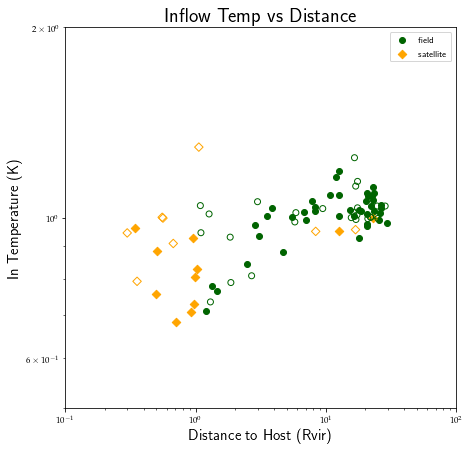

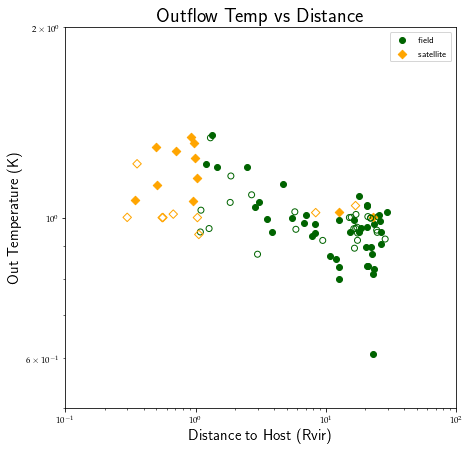

In [36]:
###Inflow

plt.figure(figsize=(7,7))
plt.scatter(dist[u & f], data['Gin_T'][u & f]/data['g_temp'][u & f], c='darkgreen', label='field')
plt.scatter(dist[u & s], data['Gin_T'][u & s]/data['g_temp'][u & s], label='satellite', c='orange', marker='D')
plt.scatter(dist[q & f], data['Gin_T'][q & f]/data['g_temp'][q & f], facecolors='none', edgecolors='darkgreen', label=None)
plt.scatter(dist[q & s], data['Gin_T'][q & s]/data['g_temp'][q & s], label=None, facecolors='none', edgecolors='orange', marker='D')
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(5e-1, 2)
plt.legend()
plt.ylabel('In Temperature (K)', size = 15)
plt.xlabel('Distance to Host (Rvir)', size=15)
plt.title('Inflow Temp vs Distance', size=20)

###Outflow

plt.figure(figsize=(7,7))
plt.scatter(dist[u & f], data['Gout_T'][u & f]/data['g_temp'][u & f], c='darkgreen', label='field')
plt.scatter(dist[u & s], data['Gout_T'][u & s]/data['g_temp'][u & s], label='satellite', c='orange', marker='D')
plt.scatter(dist[q & f], data['Gout_T'][q & f]/data['g_temp'][q & f], facecolors='none', edgecolors='darkgreen', label=None)
plt.scatter(dist[q & s], data['Gout_T'][q & s]/data['g_temp'][q & s], label=None, facecolors='none', edgecolors='orange', marker='D')
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(5e-1, 2)/data['SFR'][f]
plt.legend()
plt.ylabel('Out Temperature (K)', size = 15)
plt.xlabel('Distance to Host (Rvir)', size=15)
plt.title('Outflow Temp vs Distance', size=20)

In [129]:
data.keys()

Index(['B-V', 'B_mag', 'G_inflow_0', 'G_inflow_1.5', 'G_inflow_2.5',
       'G_outflow_0', 'G_outflow_1.5', 'G_outflow_2.5', 'Gin_T', 'Gout_T',
       'HIgasfrac', 'I_mag', 'M_gas', 'M_star', 'R_mag', 'Rmax', 'Rvir', 'SFR',
       'U_mag', 'V90_Vdisp', 'V_mag', 'Xc', 'Yc', 'Zc', 'a', 'age', 'c', 'c_a',
       'fMhires', 'feh', 'g_temp', 'gasfrac', 'h1dist', 'haloid', 'hostDist',
       'hostHalo', 'hostVirialR', 'id2', 'mHI', 'mass', 'n_gas', 'n_particles',
       'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins', 'tquench', 'zgas',
       'zstar'],
      dtype='object')